In [1]:
import _path_init
from IPython.display import display, clear_output
import numpy as np
from ndsolver.versions.revamped import MM
import matplotlib.pyplot as plt
from numpy import linalg as LA

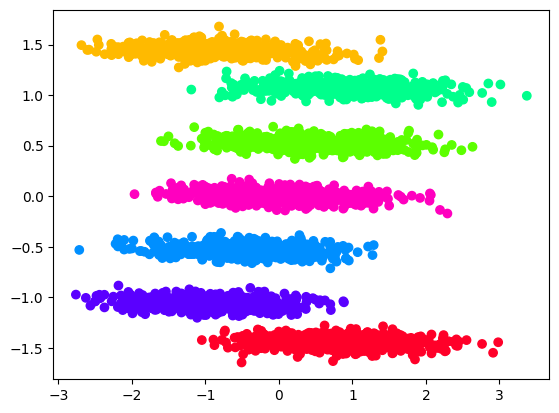

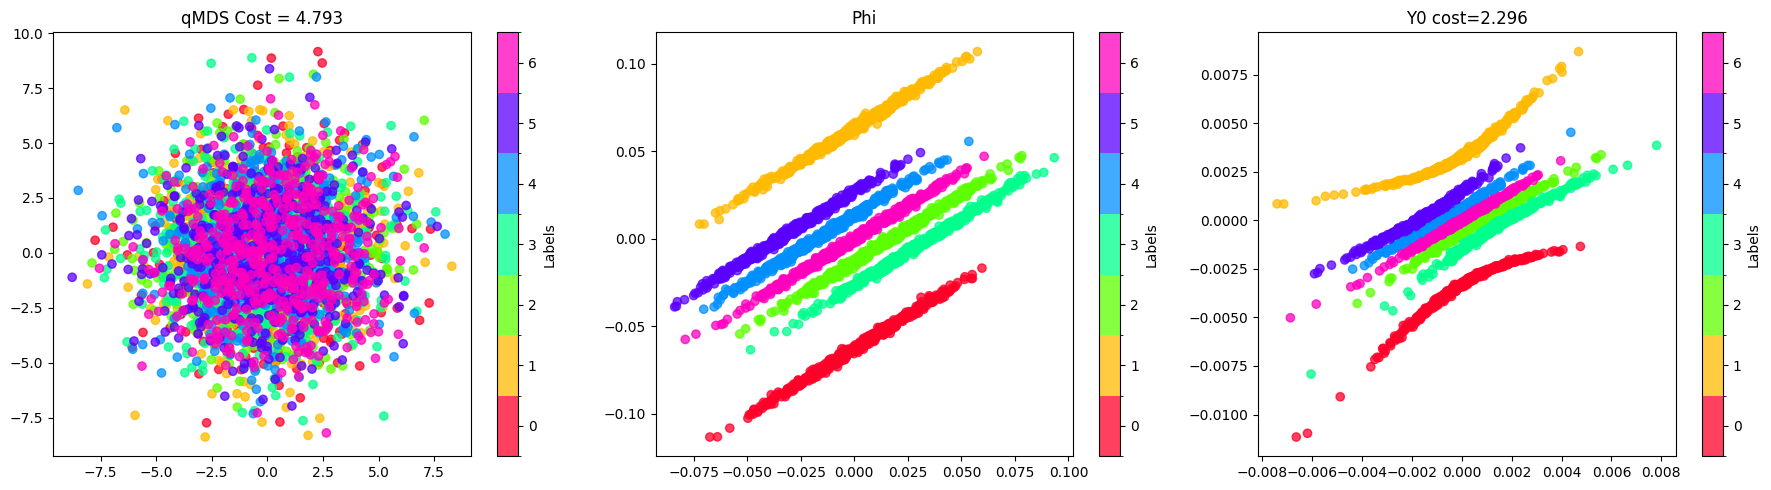

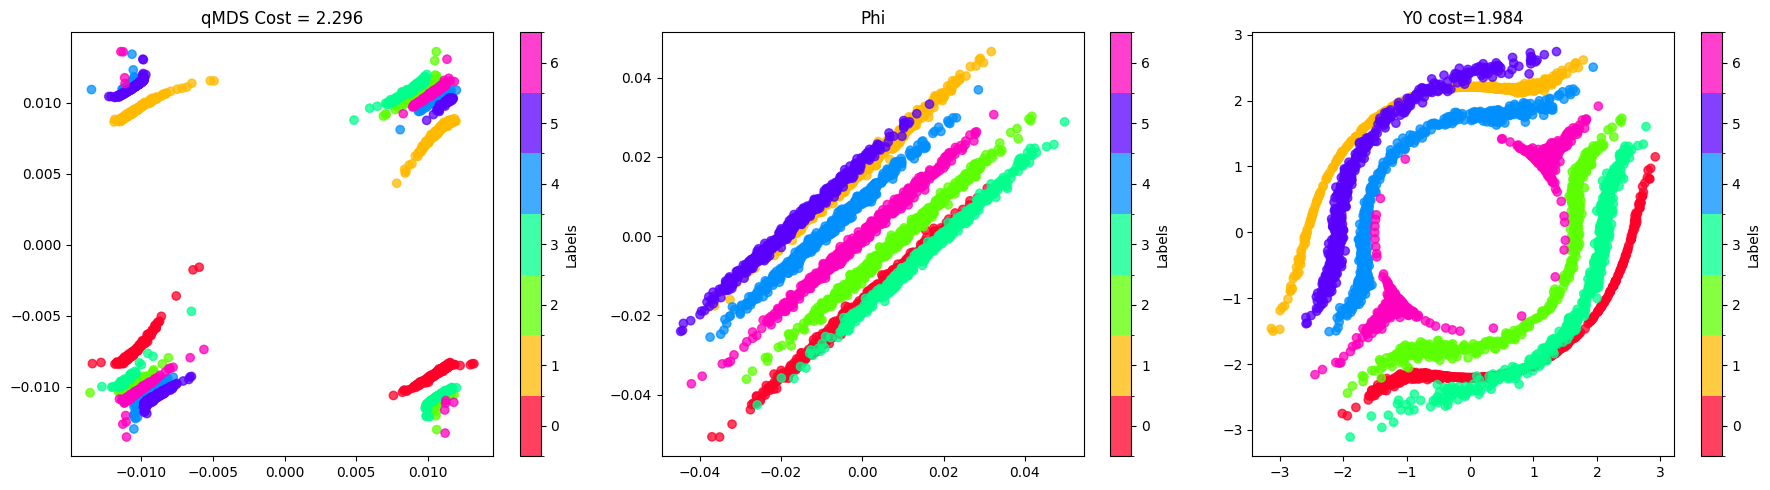

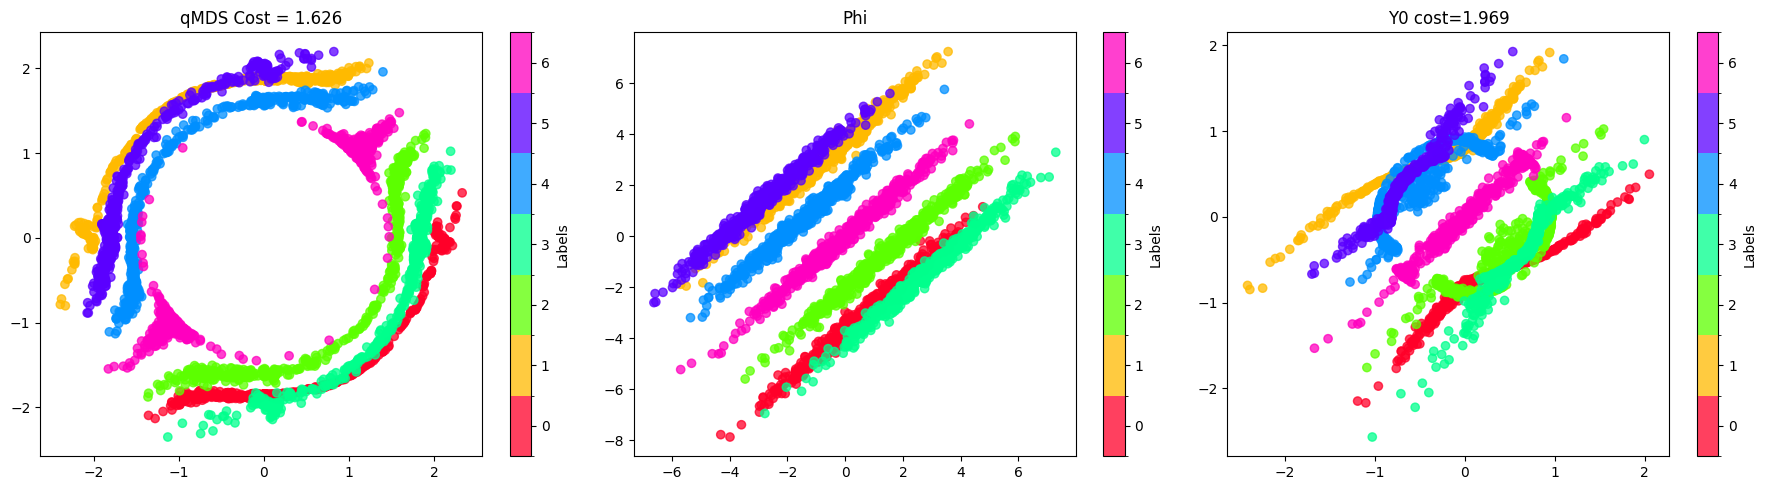

KeyboardInterrupt: 

In [3]:

k = 7
d_ = 3
p = 500
distance = 0.01
means = [[distance, 0, 0, 0,0,0], [0, distance, 0,0,0, 0], [0, 0,0,0, distance, 0], [0,0,0, 0, 0, 10*distance], [0, 0,0,distance, 0, 10*distance],[0,0,distance,0, 0, distance]]
means = [[100000000*distance,0,0],[-100000000*distance,0,0],[0,distance,0,],[0,2*distance,0],[0,-distance,0],[0,-2*distance,0],[0,0,0]]
#means = distance*np.random.rand(k,d_)
covs = [distance**(3)*np.eye(d_)] * k


X = np.concatenate([np.random.multivariate_normal(means[i], covs[i], p).T for i in range(k)], axis=1)
X-=np.mean(X,axis =1, keepdims=True)
X/=np.std(X,axis=1,keepdims = True)
labels = np.concatenate([[i] * p for i in range(k)])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z = pca.fit_transform(X.T)
plt.scatter(Z.T[0, :], Z.T[1, :], c=labels, cmap='gist_rainbow')
plt.show()




mm = MM(X, labels, init=None, init_scaling_factor = 2.5)
mm.visualize()
plt.show()
#clear_output(wait=True) 
#mm.update_state(step_size=0.025,iterations = 1000)
#mm.visualize()
#plt.show()
#clear_output(wait=True) 
for i in range(7):
    mm.update_state(step_size=0.025,iterations = 1000)
    #clear_output(wait=True) 
    mm.visualize()
    plt.show()




0
1
2
3
4
5
6
7
8
9


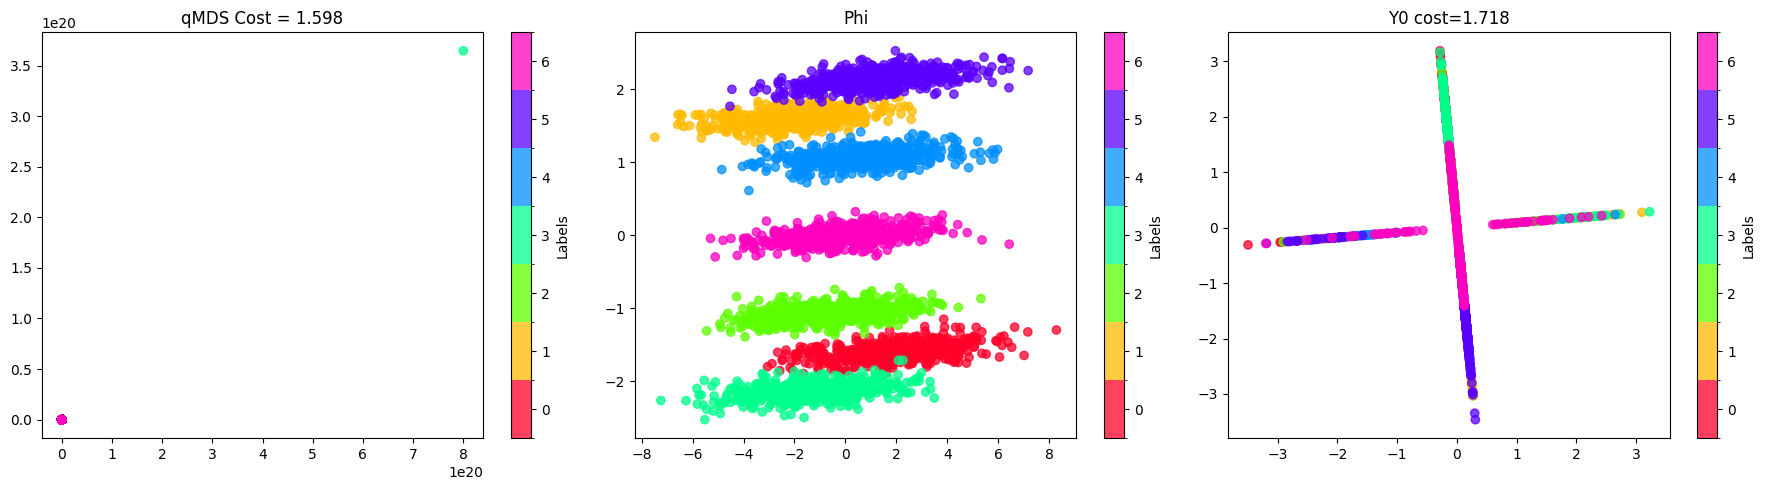

In [54]:

# Step 1: Create a grid of x, y, and z values
x = np.linspace(-2, 2, 100)  # Adjust the range and density as needed
y = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)

# Create a meshgrid for evaluation
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Step 2: Evaluate the equation at each point
# Rearrange the equation to form: f(x, y, z) = 0, where f is the left hand side minus 1
F = (1 - np.sqrt(0.02 + X**2))**2 + Y**2 + Z**2 - 1

# Use a tolerance to find points close to the surface
tolerance = 0.005  # This can be adjusted based on how strict we want the condition to be

# Find indices where the condition is satisfied
indices = np.abs(F) < tolerance

# Extract the points that satisfy the equation
points = np.array([X[indices], Y[indices], Z[indices]])  # Transpose to get points in the correct shape

points # Show the shape of the points array and the first 10 points for inspection


array([[-1.95959596, -1.95959596, -1.95959596, ...,  1.95959596,
         1.95959596,  1.95959596],
       [-0.25252525, -0.25252525, -0.25252525, ...,  0.25252525,
         0.25252525,  0.25252525],
       [-0.09090909, -0.07070707, -0.05050505, ...,  0.05050505,
         0.07070707,  0.09090909]])

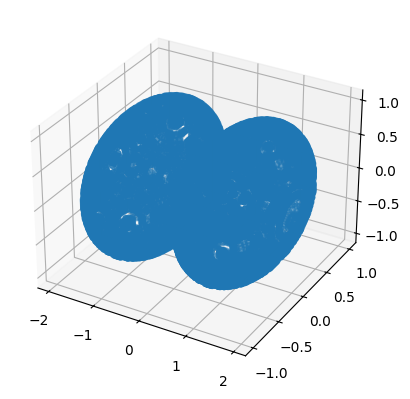

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(*points)
plt.show()

In [56]:
mm = MM(points,labels = None)

/Users/appickar/git_repos/MDS-solver/ndsolver/versions/revamped.py:179: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(self.Y[0, :], self.Y[1, :], c=self.labels, cmap=colormap, norm=norm, alpha=0.75)
/Users/appickar/git_repos/MDS-solver/ndsolver/versions/revamped.py:186: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(self.phi[0, :], self.phi[1, :], c=self.labels, cmap=colormap, norm=norm, alpha=0.75)
/Users/appickar/git_repos/MDS-solver/ndsolver/versions/revamped.py:196: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(Z[0, :], Z[1, :], c=self.labels, cmap=colormap, norm=norm, alpha=0.75,clip_on = False)


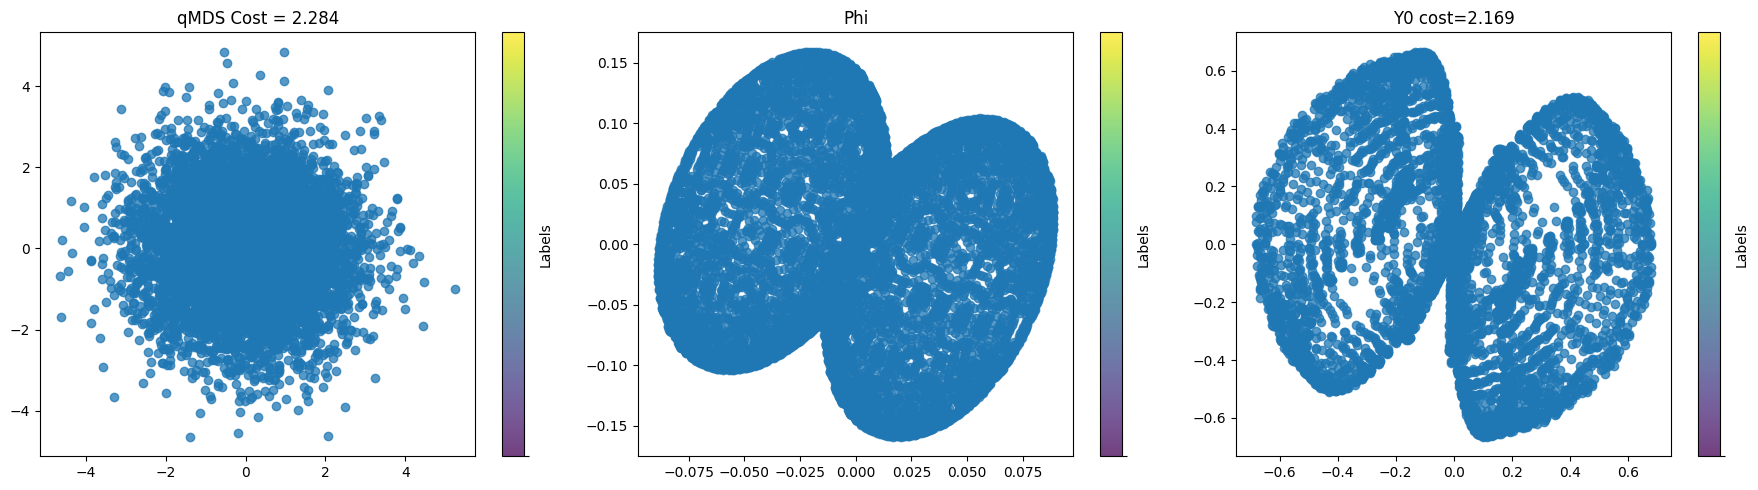

In [57]:
mm.visualize()

/Users/appickar/git_repos/MDS-solver/ndsolver/versions/revamped.py:179: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(self.Y[0, :], self.Y[1, :], c=self.labels, cmap=colormap, norm=norm, alpha=0.75)
/Users/appickar/git_repos/MDS-solver/ndsolver/versions/revamped.py:186: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(self.phi[0, :], self.phi[1, :], c=self.labels, cmap=colormap, norm=norm, alpha=0.75)
/Users/appickar/git_repos/MDS-solver/ndsolver/versions/revamped.py:196: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(Z[0, :], Z[1, :], c=self.labels, cmap=colormap, norm=norm, alpha=0.75,clip_on = False)


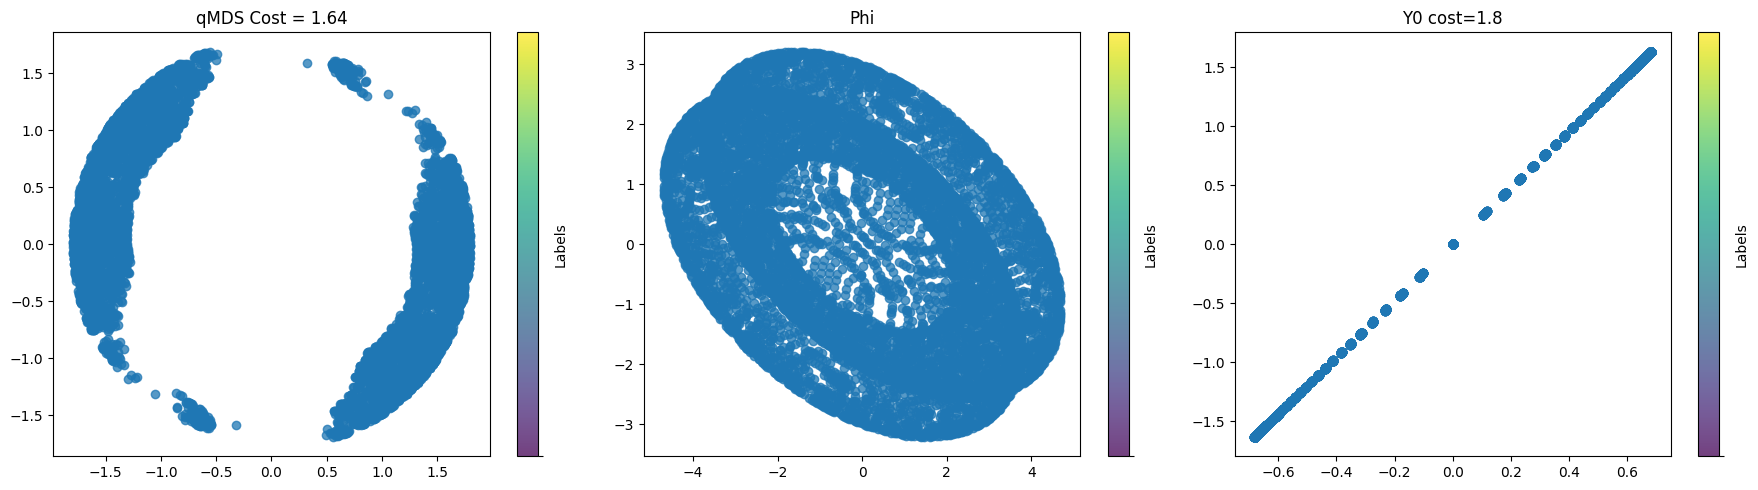

In [61]:
mm.update_state()
mm.visualize()